Import the Logistic Regression Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

file_path = r'C:\Users\Shashank Shukla\sentiment_analysis\data\IMDB Dataset.csv\IMDB Dataset.csv'
df = pd.read_csv(file_path)
print("data frame loaded")
#lowercase data
def to_lowercase(text):
    return text.lower()
#remove html tags
def remove_html_tags(text):
    pattern = re.compile('<.*?.>')
    return pattern.sub('', text)
#remove puntuations
def remove_puntuation(text):
    return re.sub(r'[^a-z0-9\s]', ' ', text).strip()# This function uses a regular expression to find and remove any character that is not a lowercase letter (a-z), a digit (0-9), or a whitespace character.
#create toen and remove stopwords
english_stopword_list = stopwords.words('english')
stop_words_set = set(english_stopword_list)
def tokenization_and_stopwords_remove(text):
    token = text.split()
    cleaned_token = [token for token in token if token not in stop_words_set]
    return cleaned_token
#lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    lemmatize_tokens = [lemmatizer.lemmatize(tokens) for tokens in tokens]
    return lemmatize_tokens
#rejoin string
def join_tokens(tokens):
    return ' '.join(tokens)
df['cleaned_review'] = df['review'].apply(to_lowercase).apply(remove_html_tags).apply(tokenization_and_stopwords_remove).apply(lemmatize_tokens).apply(join_tokens)
print(df[['review','cleaned_review','sentiment']].head())


#x will be the cleaned data and y will be the sentiment to train data
x = df['cleaned_review']
y = df['sentiment']
# print('------Features(x)--------')
# print(x.head())
# print("\n" + "="*50 + "\n")
# print("--- Target (y) ---")
# print(y.head())

#Import the train_test_split Function
#split data into training and testing set
#Scikit-learn's Dedicated Tool for the Job
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42,stratify=y)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

#model training
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train_tfidf,y_train)
y_pred = lr_model.predict(x_test_tfidf)
#train model to more precise using confuddion matrix
#classification_report this function generates text based report that  shows precision recall f1 score
#confusion matrix this function directly com[utes raw numbers for confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,y_pred)

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
from sklearn.linear_model import LogisticRegression

Train a simple model

In [6]:
lr_model = LogisticRegression(random_state=42)
print("logistic regression model initiates successfully")
print(lr_model)

logistic regression model initiates successfully
LogisticRegression(random_state=42)


In [7]:


x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)
lr_model.fit(x_train_tfidf,y_train)
print("the model is successfully trained")

the model is successfully trained


In [8]:
 #test data using x_test_tfidf
y_pred = lr_model.predict(x_test_tfidf)
print('first 20prdiction made by model')
print(y_pred[:20])
# Note: .values is used to get the NumPy array from the Pandas Series for a clean side-by-side view.
print("\n" + "="*50 + "\n")
print("Comparison of first 5 Predictions vs. Actual Labels:")
print("Predictions:", y_pred[:5])
print("Actuals:    ", y_test.values[:5])

first 20prdiction made by model
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive']


Comparison of first 5 Predictions vs. Actual Labels:
Predictions: ['negative' 'negative' 'positive' 'negative' 'negative']
Actuals:     ['negative' 'negative' 'positive' 'negative' 'negative']


In [9]:
#train model to more precise using confuddion matrix
#classification_report this function generates text based report that  shows precision recall f1 score
#confusion matrix this function directly com[utes raw numbers for confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [10]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[4434  566]
 [ 476 4524]]


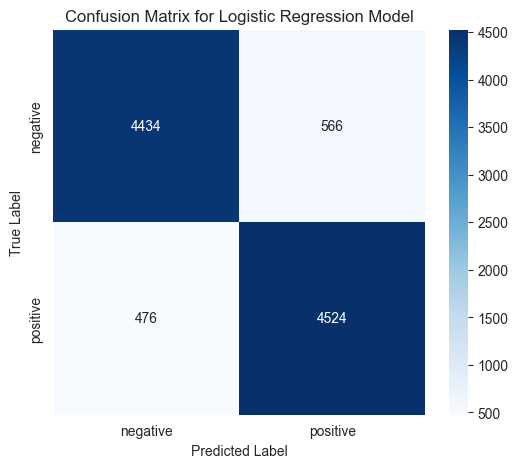

In [11]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['negative', 'positive']
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')

# Display the plot.
plt.show()

SAVE model in ram

In [12]:
import joblib

In [13]:
model_sentiment_analysis = 'lr_model.pkl'
joblib.dump(lr_model,model_sentiment_analysis)
print(f"model saved successfully to'{model_sentiment_analysis}'")

model saved successfully to'lr_model.pkl'


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Evaluate model
report = classification_report(y_test, y_pred)
print(report)

# ✅ Save model and vectorizer
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("✅ Model and Vectorizer saved successfully!")


              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

✅ Model and Vectorizer saved successfully!
